# Amazon Alexa Review Sentiment Analysis

This project focuses on sentiment analysis of Amazon Alexa product reviews using machine learning models. The dataset consists of reviews along with their ratings and feedback labels. The goal is to build and evaluate various machine learning models to classify reviews as positive or negative based on their sentiment. The project involves data loading, exploration, text preprocessing, model building, evaluation, and tuning. It utilizes popular libraries such as pandas, scikit-learn, NLTK, Matplotlib, and Seaborn for analysis and visualization.

## Data Loading and Exploration

Loading the dataset and performing initial exploratory data analysis.

In [1]:
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib library for data visualization
import seaborn as sns  # Importing Seaborn library for statistical data visualization
import nltk  # Importing NLTK (Natural Language Toolkit) library for natural language processing tasks
from nltk.stem.porter import PorterStemmer  # Importing PorterStemmer for word stemming
nltk.download('stopwords')  # Downloading NLTK stopwords data
from nltk.corpus import stopwords  # Importing NLTK stopwords
STOPWORDS = set(stopwords.words('english'))  # Setting English stopwords as a set

from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset
from sklearn.model_selection import cross_val_score  # Importing cross_val_score for cross-validation
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold  # Importing KFold for cross-validation
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler for feature scaling
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer for text vectorization
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Importing confusion_matrix and ConfusionMatrixDisplay for evaluation
from sklearn.metrics import accuracy_score  # Importing accuracy_score for accuracy evaluation
from wordcloud import WordCloud  # Importing WordCloud for creating word clouds
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier
from xgboost import XGBClassifier  # Importing XGBClassifier for XGBoost model
import pickle  # Importing pickle for model serialization
import re  # Importing re for regular expressions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv("amazon_alexa.tsv", delimiter="\t", quoting=3)  # Reading the TSV file into a DataFrame

In [3]:
df.head()  # Displaying the first few rows of the DataFrame

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.columns  # Displaying the column names of the DataFrame

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
df.info()  # Displaying information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
df[df['verified_reviews'].isna() == True]  # Filtering rows where the 'verified_reviews' column is NaN

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
df.dropna(inplace=True)  # Dropping rows with missing values

In [8]:
df[df['verified_reviews'].isna() == True]  # Checking if there are still rows with NaN values in the 'verified_reviews' column

,rating,date,variation,verified_reviews,feedback


In [9]:
df['length'] = df['verified_reviews'].apply(len)  # Calculating the length of each review and storing it in a new column 'length'

In [10]:
df['length'] = df['verified_reviews'].apply(len)  # Calculating the length of each review and storing it in a new column 'length'

In [11]:
df.dtypes  # Displaying the data types of each column in the DataFrame

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [12]:
df['rating'].value_counts()  # Counting the occurrences of each unique value in the 'rating' column

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

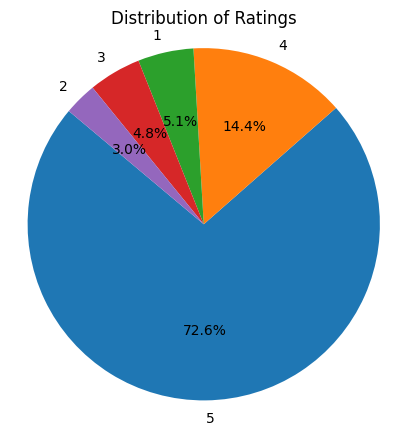

In [13]:
rating_percentages = df['rating'].value_counts() / len(df['rating']) * 100  # Calculating the percentage distribution of ratings
plt.figure(figsize=(5, 5))  # Setting the figure size
plt.pie(rating_percentages, labels=rating_percentages.index, autopct='%1.1f%%', startangle=140)  # Creating a pie chart
plt.title('Distribution of Ratings')  # Setting the title of the plot
plt.axis('equal')  # Setting the aspect ratio to be equal
plt.show()  # Displaying the plot

In [14]:
df['feedback'].value_counts()  # Counting the occurrences of each unique value in the 'feedback' column

feedback
1    2893
0     256
Name: count, dtype: int64

In [15]:
review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']  # Extracting the second review with feedback value 0
review_0  # Displaying the review

'Sound is terrible if u want good music too get a bose'

In [16]:
review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']  # Extracting the second review with feedback value 1
review_1  # Displaying the review

'Loved it!'

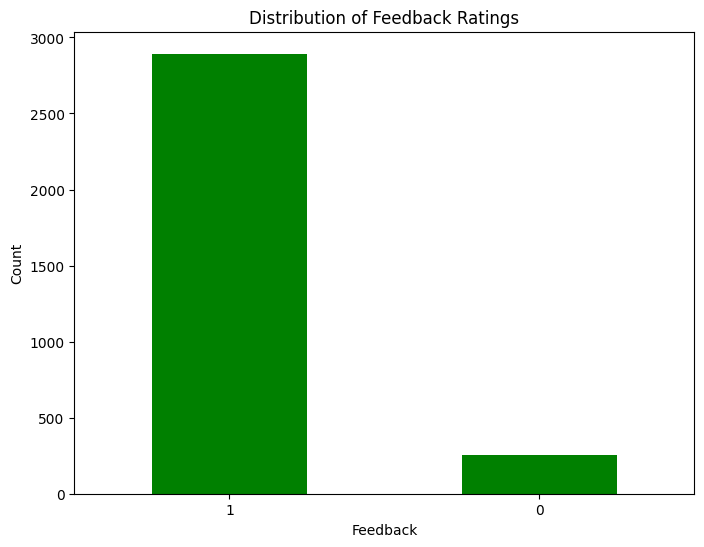

In [17]:
fb = df['feedback'].value_counts()  # Counting the occurrences of each unique value in the 'feedback' column
plt.figure(figsize=(8, 6))  # Setting the figure size
fb.plot(kind="bar", color="green")  # Creating a bar plot
plt.xlabel("Feedback")  # Setting the label for the x-axis
plt.ylabel("Count")  # Setting the label for the y-axis
plt.title("Distribution of Feedback Ratings")  # Setting the title of the plot
plt.xticks(rotation=0)  # Setting the rotation of x-axis labels
plt.show()  # Displaying the plot

In [18]:
round(df['feedback'].value_counts() / len(df) * 100, 2)  # Calculating the percentage distribution of feedback ratings and rounding to two decimal places

feedback
1    91.87
0     8.13
Name: count, dtype: float64

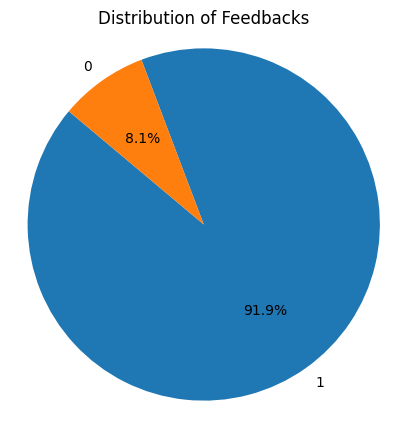

In [19]:
feedback_percentage = df['feedback'].value_counts() / len(df) * 100  # Calculating the percentage distribution of feedback ratings
plt.figure(figsize=(5, 5))  # Setting the figure size
plt.pie(feedback_percentage, labels=feedback_percentage.index, autopct='%1.1f%%', startangle=140)  # Creating a pie chart
plt.title('Distribution of Feedbacks')  # Setting the title of the plot
plt.axis('equal')  # Setting the aspect ratio to be equal
plt.show()  # Displaying the plot

In [20]:
# Feedback = 0
df[df['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [21]:
# Feedback = 1
df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [22]:
df['variation'].value_counts()  # Counting the occurrences of each unique value in the 'variation' column

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

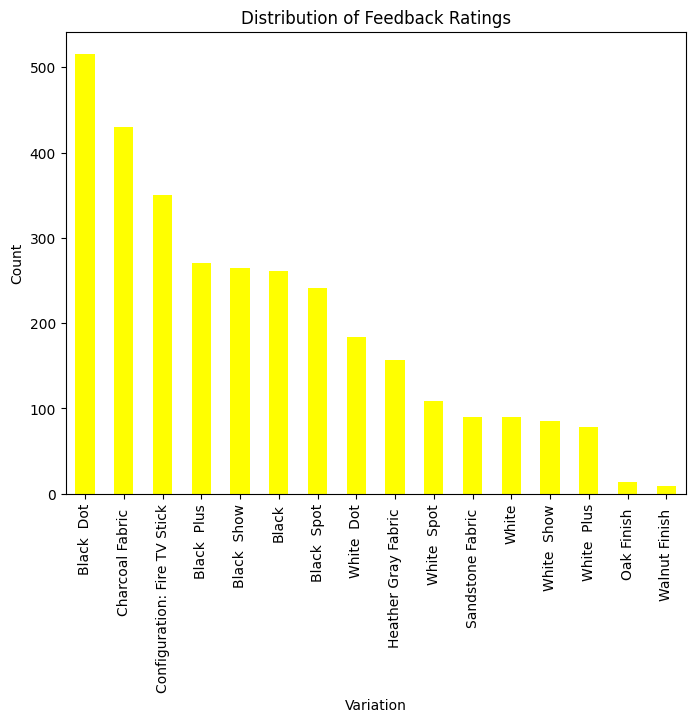

In [23]:
var = df['variation'].value_counts()  # Counting the occurrences of each unique value in the 'variation' column
plt.figure(figsize=(8, 6))  # Setting the figure size
var.plot(kind="bar", color="yellow")  # Creating a bar plot
plt.xlabel("Variation")  # Setting the label for the x-axis
plt.ylabel("Count")  # Setting the label for the y-axis
plt.title("Distribution of Feedback Ratings")  # Setting the title of the plot
plt.show()  # Displaying the plot

In [24]:
round(df['variation'].value_counts() / len(df['variation']) * 100, 2)  # Calculating the percentage distribution of variations and rounding to two decimal places

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64

In [25]:
df.groupby('variation')['rating'].mean()  # Calculating the mean rating for each variation

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

In [26]:
df['length'].describe()  # Generating descriptive statistics of the 'length' column

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, "Distribution of review's length")]

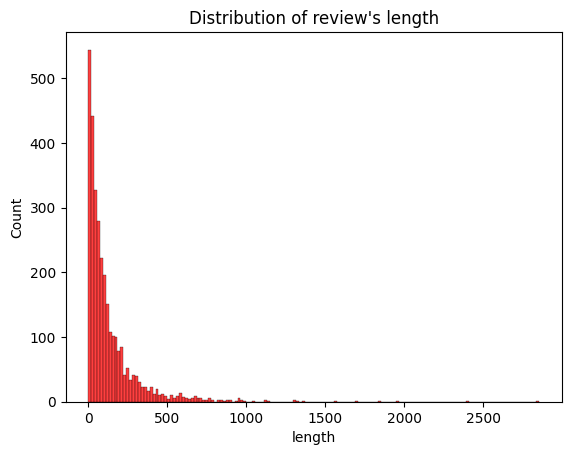

In [27]:
sns.histplot(df['length'], color="red").set(title="Distribution of review's length")  # Creating a histogram plot of review lengths with a title

[Text(0.5, 1.0, "Distribution of review's length if feedback is 0")]

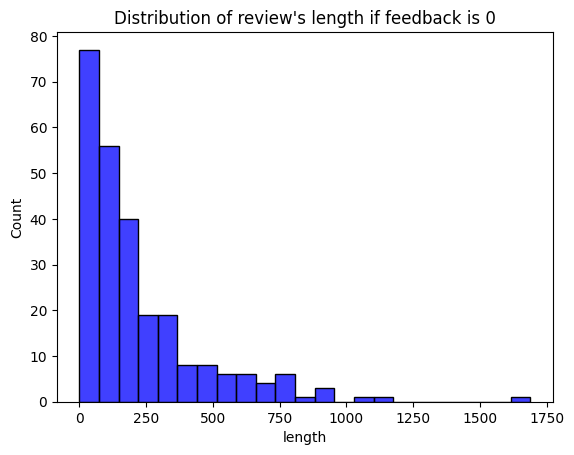

In [28]:
sns.histplot(df[df['feedback'] == 0]['length'], color="blue").set(title="Distribution of review's length if feedback is 0")  # Creating a histogram plot of review lengths where feedback is 0 with a title

[Text(0.5, 1.0, "Distribution of review's length if feedback is 1")]

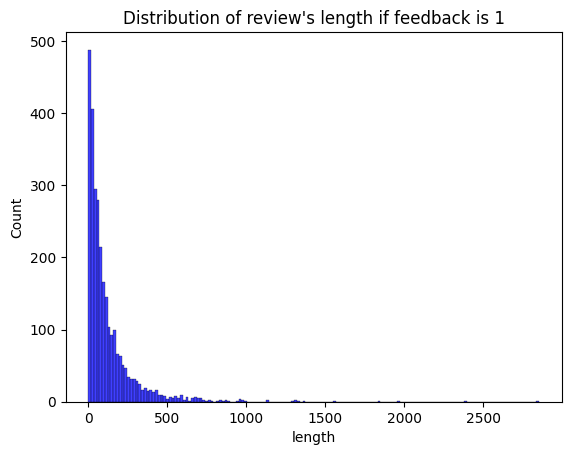

In [29]:
sns.histplot(df[df['feedback'] == 1]['length'], color="blue").set(title="Distribution of review's length if feedback is 1")  # Creating a histogram plot of review lengths where feedback is 1 with a title

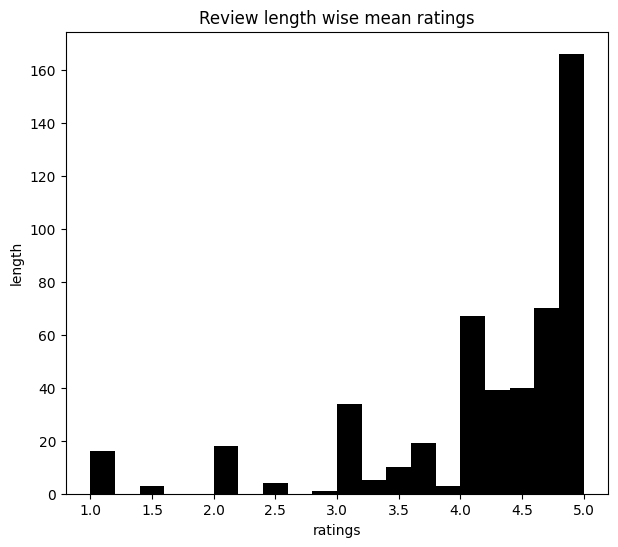

In [30]:
rat = df.groupby('length')['rating'].mean()  # Calculating the mean rating for each review length
plt.figure(figsize=(7, 6))  # Setting the figure size
plt.hist(rat, color="black", bins=20)  # Creating a histogram plot of review length wise mean ratings
plt.title("Review length wise mean ratings")  # Setting the title of the plot
plt.xlabel('ratings')  # Setting the label for the x-axis
plt.ylabel('length')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

In [31]:
cv = CountVectorizer(stop_words="english")  # Initializing CountVectorizer with English stopwords
words = cv.fit_transform(df.verified_reviews)  # Transforming the text data into a sparse matrix of token counts

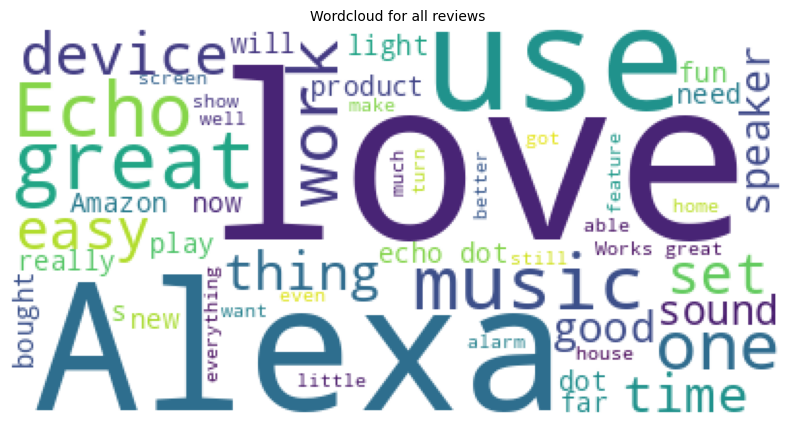

In [32]:
# Combining
reviews = " ".join([review for review in df['verified_reviews']])

# Initializing wordcloud object
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("Wordcloud for all reviews", fontsize=10)
plt.axis('off')
plt.show()

In [33]:
# Concatenating all negative reviews into a single string and splitting into words
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

# Concatenating all positive reviews into a single string and splitting into words
pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

# Filtering out unique words in negative reviews
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

# Filtering out unique words in positive reviews
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

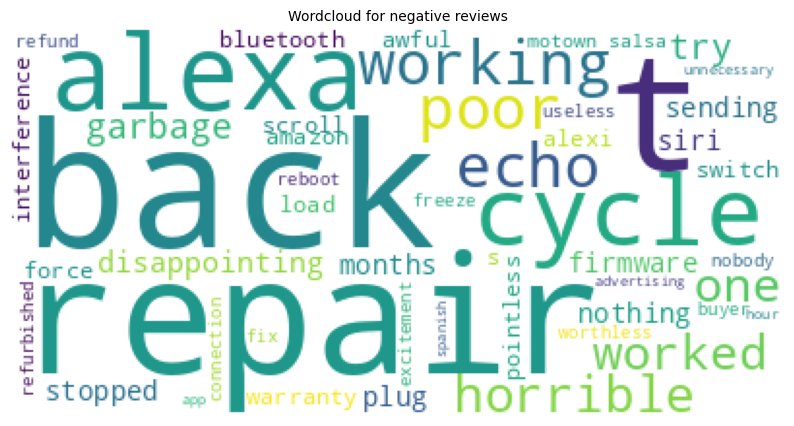

In [34]:
wc = WordCloud(background_color="white", max_words=50)  # Initializing WordCloud object with white background and maximum 50 words
plt.figure(figsize=(10, 10))  # Setting the figure size
plt.imshow(wc.generate(unique_negative))  # Generating word cloud for unique negative words
plt.title("Wordcloud for negative reviews", fontsize=10)  # Setting the title of the plot
plt.axis('off')  # Turning off axis
plt.show()  # Displaying the plot

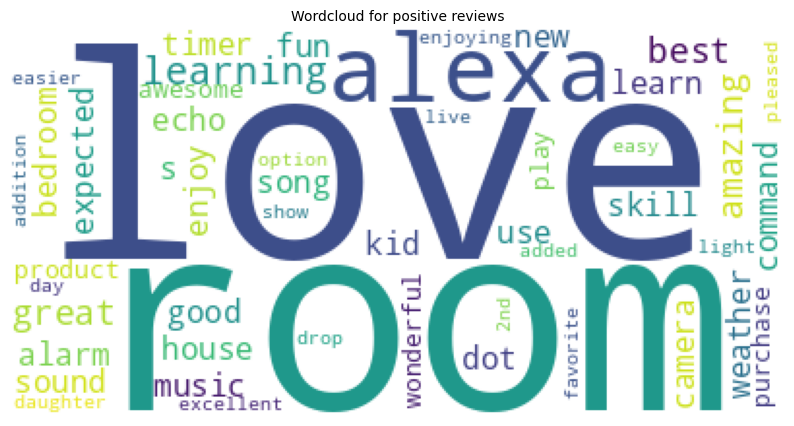

In [35]:
wc = WordCloud(background_color="white", max_words=50)  # Initializing WordCloud object with white background and maximum 50 words
plt.figure(figsize=(10, 10))  # Setting the figure size
plt.imshow(wc.generate(unique_positive))  # Generating word cloud for unique positive words
plt.title("Wordcloud for positive reviews", fontsize=10)  # Setting the title of the plot
plt.axis('off')  # Turning off axis
plt.show()  # Displaying the plot

## Text Preprocessing

Preprocessed the text data for modeling.

In [36]:
corpus = []  # Initializing an empty list to store preprocessed reviews
stemmer = PorterStemmer()  # Initializing PorterStemmer for word stemming
for i in range(0, df.shape[0]):  # Iterating over each row in the DataFrame
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])  # Removing non-alphabetic characters
  review = review.lower().split()  # Converting review to lowercase and splitting into words
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]  # Stemming each word and removing stopwords
  review = ' '.join(review)  # Joining the stemmed words back into a single string
  corpus.append(review)  # Appending the preprocessed review to the corpus list

In [37]:
cv = CountVectorizer(max_features=2500)  # Initializing CountVectorizer with maximum 2500 features
X = cv.fit_transform(corpus).toarray()  # Transforming the preprocessed text data into a feature matrix
y = df['feedback'].values  # Extracting the target variable 'feedback'

In [38]:
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))  # Pickling the CountVectorizer object to a file named 'countVectorizer.pkl'

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)  # Splitting the data into training and testing sets with a test size of 30% and random state of 15

In [40]:
scaler = MinMaxScaler()  # Initializing MinMaxScaler for feature scaling
X_train_scl = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scl = scaler.transform(X_test)  # Scaling the testing data using the same scaler

In [41]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))  # Pickling the MinMaxScaler object to a file named 'scaler.pkl'

## Model Building and Evaluation

Built machine learning models and evaluated their performance.

In [42]:
model_rf = RandomForestClassifier()  # Initializing a Random Forest Classifier
model_rf.fit(X_train_scl, y_train)  # Fitting the classifier to the scaled training data

RandomForestClassifier()

In [43]:
print("Training accuracy: ", model_rf.score(X_train_scl, y_train))
print("Testing accuracy: ", model_rf.score(X_test_scl, y_test))

Training accuracy:  0.9945553539019963
Testing accuracy:  0.944973544973545


In [44]:
y_preds = model_rf.predict(X_test_scl)

In [45]:
cm = confusion_matrix(y_test, y_preds)  # Calculating the confusion matrix using predicted and true labels

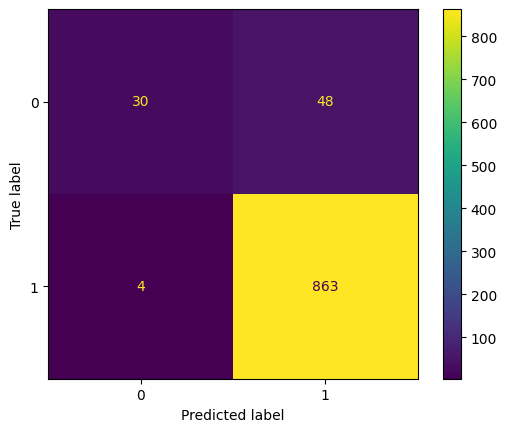

In [46]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)  # Creating a ConfusionMatrixDisplay object
cm_display.plot()  # Plotting the confusion matrix
plt.show()  # Displaying the plot

In [47]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy: ", accuracies.mean())
print("Standard Variance: ", accuracies.std())

Accuracy:  0.9324002468120114
Standard Variance:  0.00915093902687361


## Model Tuning

Tuned the hyperparameters of the RandomForestClassifier model using GridSearchCV.

In [48]:
params = {
    'bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'max_depth': [80, 100],  # Maximum depth of the trees
    'min_samples_split': [8, 12],  # Minimum number of samples required to split an internal node
    'n_estimators': [100, 300]  # Number of trees in the forest
}

In [49]:
cv_object = StratifiedKFold(n_splits=2)  # Initializing Stratified K-Folds cross-validator
grid_search = GridSearchCV(estimator=model_rf, param_grid=params, cv=cv_object, verbose=0, return_train_score=True)  # Initializing GridSearchCV with random forest classifier, parameter grid, and cross-validator
grid_search.fit(X_train_scl, y_train.ravel())  # Fitting the grid search to the scaled training data

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [50]:
print("Best Parameter Combination: {}".format(grid_search.best_params_))

Best Parameter Combination: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [51]:
print("Cross validation mean accuracy on train set: {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set: {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print('Accuracy score for test set: ', accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set: 96.68784029038113
Cross validation mean accuracy on test set: 92.1676497277677
Accuracy score for test set:  0.944973544973545


In [52]:
model_xgb = XGBClassifier()  # Initializing an XGBoost classifier
model_xgb.fit(X_train_scl, y_train)  # Fitting the classifier to the scaled training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print("Training Accuracy: ", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_xgb.score(X_test_scl, y_test))

Training Accuracy:  0.971415607985481
Testing Accuracy:  0.9417989417989417


In [54]:
y_preds = model_xgb.predict(X_test)  # Making predictions on the test data using the trained XGBoost classifier

In [55]:
cm = confusion_matrix(y_test,y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


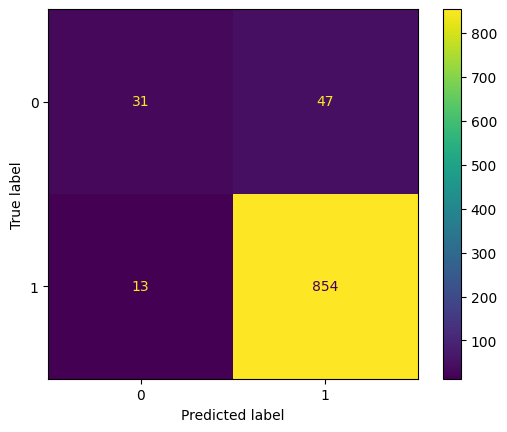

In [56]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)  # Creating a ConfusionMatrixDisplay object
cm_display.plot()  # Plotting the confusion matrix
plt.show()  # Displaying the plot

In [57]:
model_dt = DecisionTreeClassifier()  # Initializing a Decision Tree Classifier
model_dt.fit(X_train_scl, y_train)  # Fitting the classifier to the scaled training data

DecisionTreeClassifier()

In [58]:
print("Training Accuracy: ", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_dt.score(X_test_scl, y_test))

Training Accuracy:  0.9945553539019963
Testing Accuracy:  0.9216931216931217


In [59]:
y_preds = model_dt.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 40  38]
 [ 81 786]]


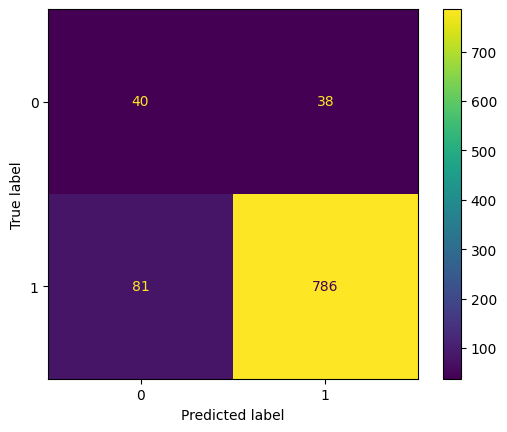

In [61]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)  # Creating a ConfusionMatrixDisplay object
cm_display.plot()  # Plotting the confusion matrix
plt.show()  # Displaying the plot